# **Rollback Segment**

- 데이터(튜플)을 replace하고 별도저장소에 변경전 데이터를 보관해놓고 활용하는 방법이다.
- 데이터를 업데이트할 때, 이전 값을 undo segment에 저장하고, 실제 변경을 수행
- 데이터베이스에는 언제나 최신 버전의 레코드만 저장되게 되고, 필요할 때는 undo segment를 이용하여 이전 버전의 데이터를 재구성할 수 있게 된다.
- 사용자의 query가 들어오면 현재 격리 수준에 맞춰 데이터베이스에 저장된 값과 undo segment의 데이터를 참고해서 적절한 데이터를 반환


- 롤백 세그먼트 메커니즘에서는 업데이트문이 실행되면 기존 데이터 블록 내의 데이터 레코드를 새로운 버전(New Version)으로 변경하고, 이전 버전(Old Version)을 별도의 저장소인 롤백 세그먼트에 보관.

- 이후 셀렉트문이 실행될 때, 셀렉트 SCN과 데이터 블록의 SCN을 비교해 읽기 일관성(Consistent Read)이 필요하다고 판단되면 롤백 세그먼트의 이전 버전을 읽어서 버퍼 캐시에 CR블록을 생성.
  - 셀렉트 쿼리의 스냅샷 읽기를 보장해주는 이 방법은 유명한 ‘ORA-1555(Snapshot too old)’ 에러라는 한계를 제외하고는 동시성을 극대화시키는 방법.

- 오라클은 롤백 세그먼트를 통해 Read Committed 격리 수준(Isolation Level)에서 거의 완벽한 MVCC를 구현
.


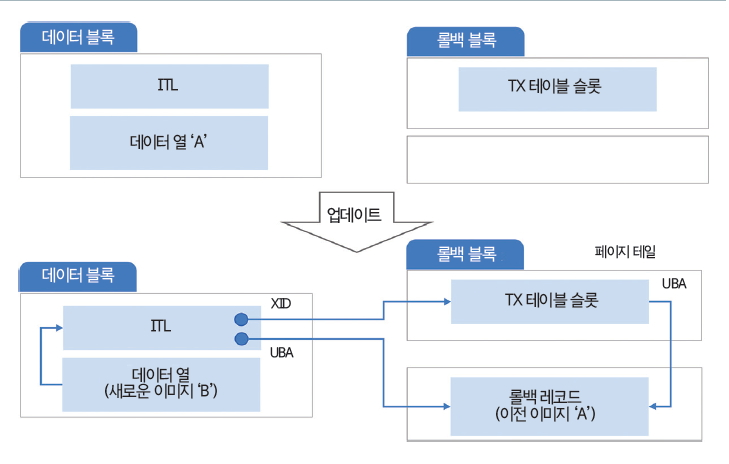

- 오라클의 롤백 세그먼트 동작원리.
  - 데이터 블록에 있는 현재 버전인 A를 B로 업데이트하게 되면 이전 버전인 A를 별도의 롤백 블록에 저장하고, 데이터 블록에는 새로운 버전인 B로 변경하게 된다.
  -  MGA 아키텍처와는 달리 이전 버전을 별도의 저장 공간인 롤백 세그먼트에 저장하고 데이터 블록에는 오직 현재 버전만 존재하는 것.


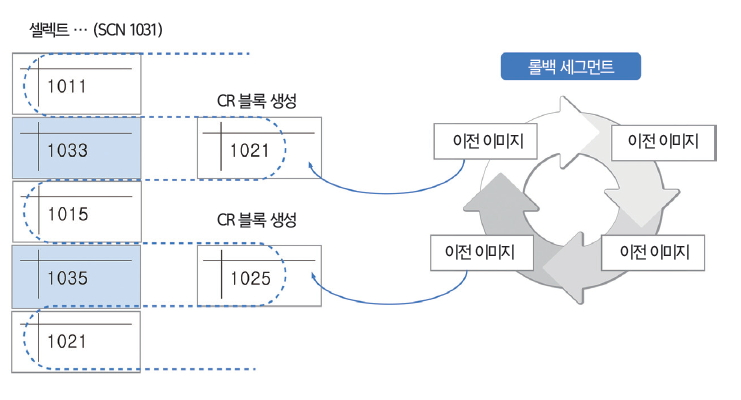

- 롤백 세그먼트를 사용하는 아키텍처는 <그림>처럼 셀렉트 시점에 SCN을 비교해서 읽기 일관성을 위해서 롤백 세그먼트에 존재하는 해당 이전 버전을 찾아서 버퍼 캐시에 CR 블록을 생성.
  - 이렇게 CR 블록을 생성함으로써 셀렉트 시점의 스냅샷 이미지를 읽을 수 있다.



**롤백 세그먼트를 활용하는 데이터베이스 아키텍처에서의 읽기 일관성 메커니즘:**

- 이 아키텍처는 사용자가 데이터를 조회(Select)할 때, 시스템 변경 번호(System Change Number, SCN)를 기준으로 현재 데이터와 일치하는 시점의 데이터를 찾기 위해 롤백 세그먼트를 사용.
- 롤백 세그먼트에는 데이터의 이전 버전이 저장되어 있으며, 이는 데이터가 변경되기 이전의 상태를 나타냅니다.
- 사용자가 데이터를 조회할 때, 데이터베이스 시스템은 현재 SCN과 일치하는 데이터의 상태를 찾아서 버퍼 캐시에 '일관된 읽기(Consistent Read, CR) 블록'을 생성합니다.
- CR 블록은 사용자가 조회하는 시점에서의 데이터 상태, 즉 스냅샷 이미지를 반영합니다. 이를 통해, 데이터베이스는 동시에 여러 트랜잭션이 수행되더라도, 각 사용자에게 일관된 데이터 뷰를 제공할 수 있습니다.

**InnoDB의 데이터 일관성 접근 방식:**

- InnoDB는 롤백 세그먼트를 별도로 유지하여 데이터의 이전 버전을 저장합니다. 이 점에서는 앞서 언급한 일반적인 롤백 세그먼트를 활용하는 아키텍처와 유사합니다.
- InnoDB는 트랜잭션을 관리하는 데 트랜잭션 ID와 리드뷰(Read View)를 사용합니다. 이러한 방식은 데이터의 일관된 상태를 유지하는 데 중요한 역할을 합니다.
- 특성으로 인해 InnoDB는 데이터의 이전 버전을 저장하고 관리하는 방식(두 번째 흐름)과 트랜잭션의 메타데이터를 활용하는 방식(첫 번째 흐름) 사이에 위치합니다. 이는 InnoDB가 데이터 일관성을 유지하는 데 있어 두 가지 접근 방식의 장점을 모두 활용한다는 것을 의미합니다.

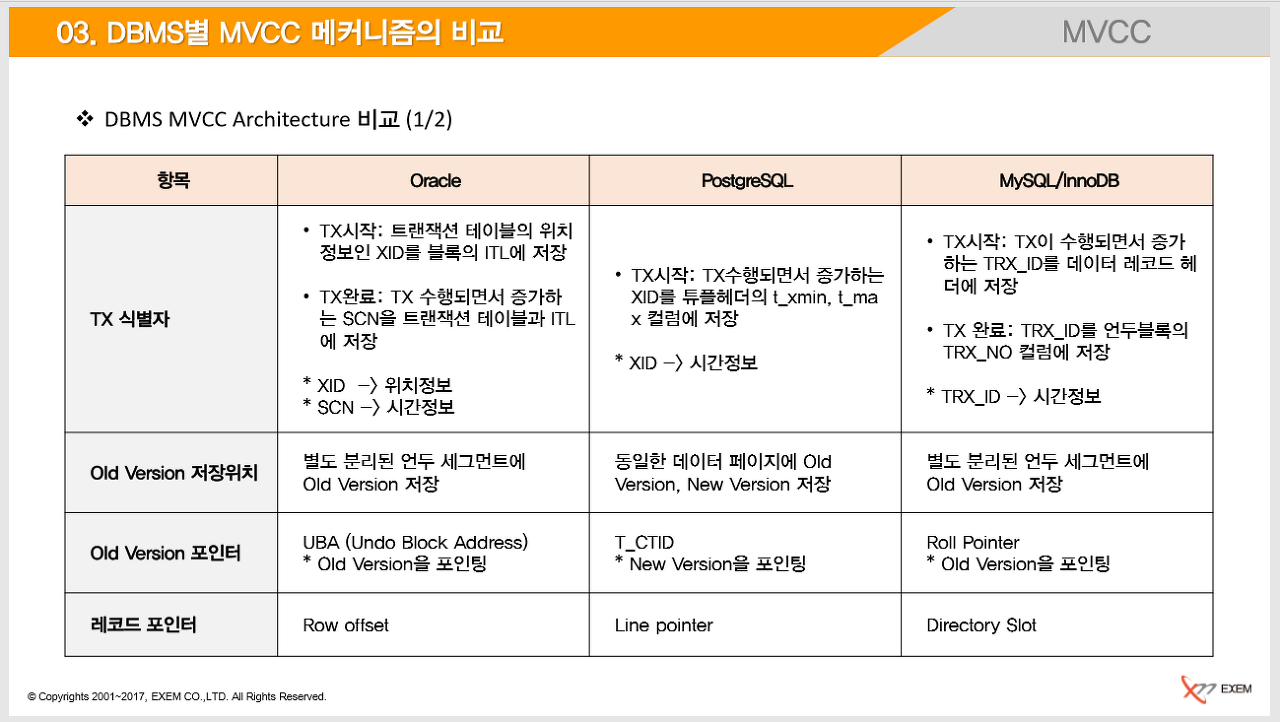

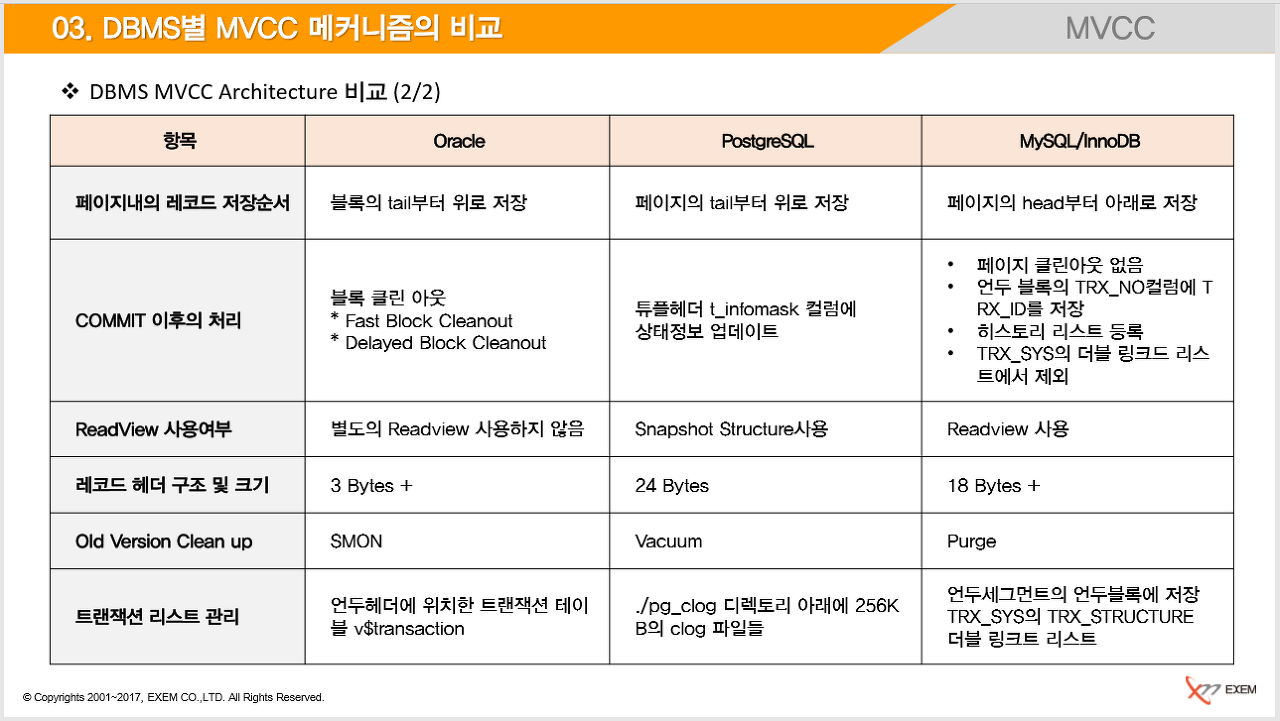